In [ ]:
!pip install imagecodecs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageOps
import skimage
from skimage import io
import tifffile as tiff

In [ ]:
!pip install geopandas
import geopandas as gpd

In [ ]:
import google.colab
google.colab.drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This cell will parse coordinates from geojson data for future images downloading

import json
import glob

true_coords = []
titles = []

for f in sorted(glob.glob('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/geojson/AoE/*.geojson')):
    title = f[f.find('AoE/') + 4:f.find('.geo')]
    print(title)
    with open(f) as path:
      data = json.load(path)
    coords = data['features'][0]['geometry']['coordinates'][0]
    true_coords.append(coords)
    titles.append(title)

aoe_1
aoe_10
aoe_11
aoe_12
aoe_13
aoe_14
aoe_15
aoe_16
aoe_17
aoe_18
aoe_19
aoe_2
aoe_20
aoe_3
aoe_4
aoe_5
aoe_6
aoe_7
aoe_8
aoe_9


In [ ]:
def save(filepath, fig=None):
    '''Save the current image with no whitespace
    Example filepath: "myfig.png" or r"C:\myfig.pdf" 
    '''
    import matplotlib.pyplot as plt
    if not fig:
        fig = plt.gcf()

    plt.subplots_adjust(0,0,1,1,0,0)
    for ax in fig.axes:
        ax.axis('off')
        ax.margins(0,0)
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
    fig.savefig(filepath, pad_inches = 0, bbox_inches='tight', dpi = 1000)

aoe_1
aoe_10
aoe_11
aoe_12
aoe_13
aoe_14
aoe_15
aoe_16
aoe_17
aoe_18
aoe_19
aoe_2
aoe_20
aoe_3
aoe_4
aoe_5
aoe_6
aoe_7
aoe_8
aoe_9


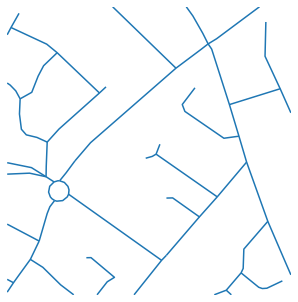

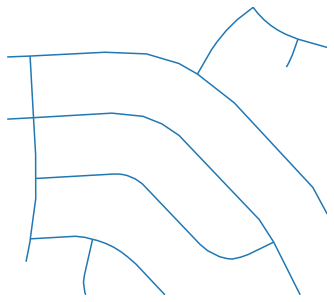

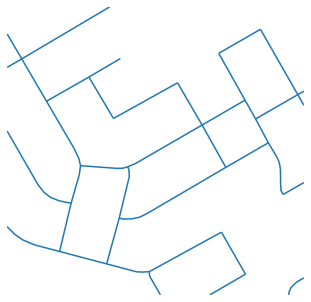

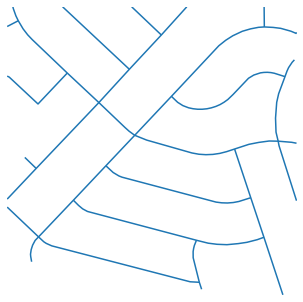

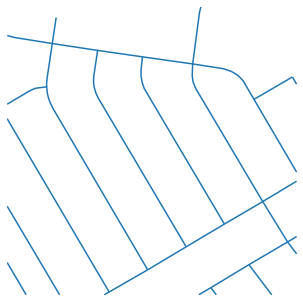

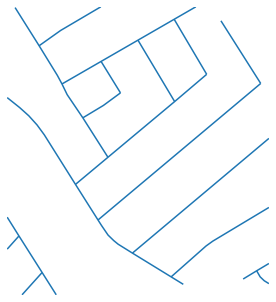

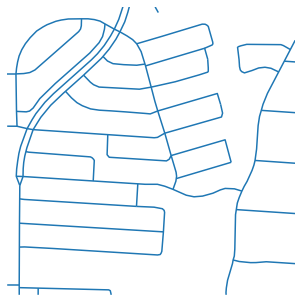

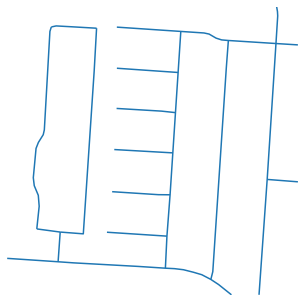

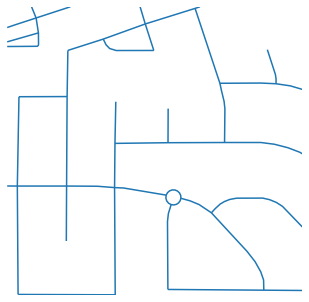

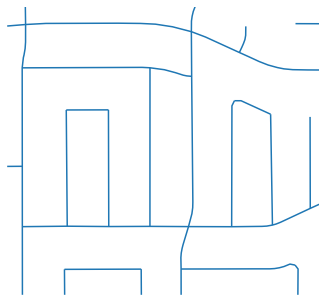

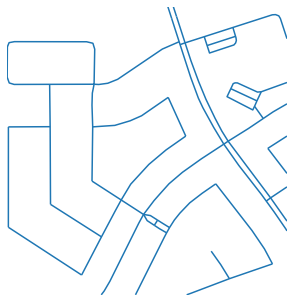

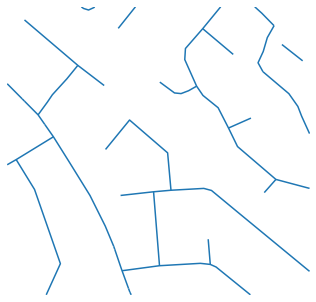

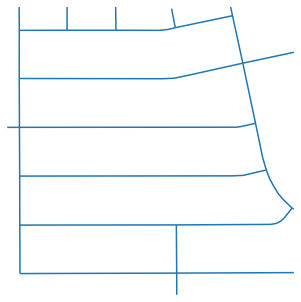

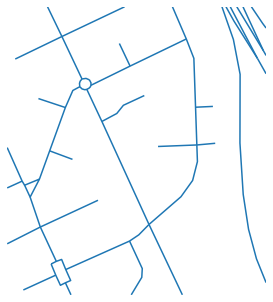

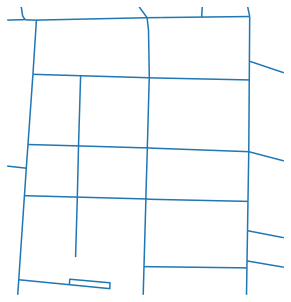

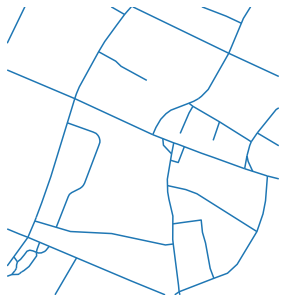

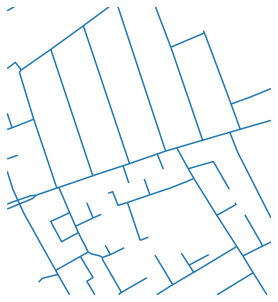

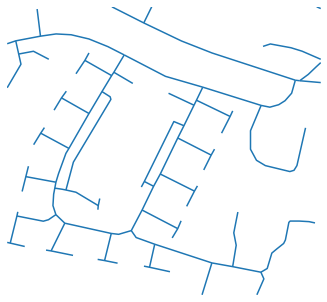

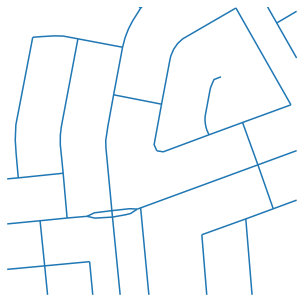

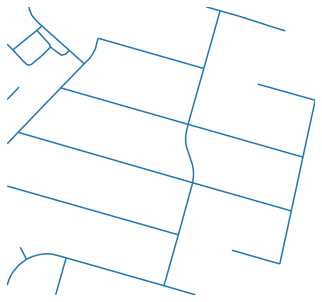

In [ ]:
# This cell will convert masks from vector to raster and save them

for i, f in enumerate(sorted(glob.glob('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/geojson/roads/*.geojson'))):
    print(titles[i])
    
    poly = gpd.read_file(f)
    fig, ax = plt.subplots(1)
    ax = poly.plot(ax=ax)
    ax.set_axis_off()
    #plt.show()
    #fig.savefig('/content/drive/My Drive/GeoAlert/Custom_dataset/1.png',pad_inches = 0, bbox_inches='tight', dpi=400)

    save('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/masks/'+titles[i], fig)

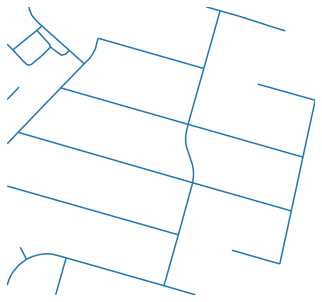

In [ ]:
    poly = gpd.read_file('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/geojson/roads/roads_9.geojson')
    fig, ax = plt.subplots(1)
    ax = poly.plot(ax=ax)
    ax.set_axis_off()
    #plt.show()
    #fig.savefig('/content/drive/My Drive/GeoAlert/Custom_dataset/1.png',pad_inches = 0, bbox_inches='tight', dpi=400)

    save('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/masks/aoe_9.png', fig)

(1061, 940)
(4278, 4000)


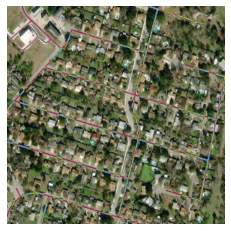

In [ ]:
image = skimage.io.imread('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/cropped/aoe_9.tif')
image = Image.fromarray((image).astype(np.uint8))
print(image.size)

#image = image.crop((0, 0, 3338-1, 3348-1)) 
image = image.resize((512, 512),Image.ANTIALIAS)


fig = plt.figure()
mask = skimage.io.imread('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/masks/aoe_9.png')
mask = Image.fromarray((mask).astype(np.uint8))
print(mask.size)
mask = mask.resize((512, 512),Image.ANTIALIAS)
plt.imshow(np.array(image) + np.array(mask)[:,:,:3])

plt.axis('off')

fig.savefig('/content/drive/My Drive/GeoAlert/Custom_dataset/2.png', bbox_inches='tight', dpi=400)

In [ ]:
from osgeo import gdal
import glob

def GetCornerCoordinates(FileName):
    info = gdal.Info(FileName)

    UL = info[info.find(') (')+3 : info.find('N)') ]
    print(UL )
    UL_long = int(UL[:UL.find('d')]) + int(UL[UL.find('d')+1:UL.find('\'')]) / 60 + float(UL[UL.find('\'')+1:UL.find('"')]) / 3600
    if UL.find('W') != -1:
      UL_long = -UL_long

    UL = UL[UL.find(',')+1:]
    UL_lat = int(UL[:UL.find('d')]) + int(UL[UL.find('d')+1:UL.find('\'')]) / 60 + float(UL[UL.find('\'')+1:UL.find('"')]) / 3600
    if UL.find('S') != -1:
      UL_lat = -UL_lat
    UL = [UL_long, UL_lat]

    info = info[info.find('Lower Left'):]

    LL = info[info.find(') (')+3: info.find('N)')]
    print(LL.find('"'))
    LL_long = int(LL[:LL.find('d')]) + int(LL[LL.find('d')+1:LL.find('\'')]) / 60 + float(LL[LL.find('\'')+1:LL.find('"')]) / 3600
    if LL.find('W') != -1:
      LL_long = -LL_long

    LL = LL[LL.find(',')+1:]
    LL_lat = int(LL[:LL.find('d')]) + int(LL[LL.find('d')+1:LL.find('\'')]) / 60 + float(LL[LL.find('\'')+1:LL.find('"')]) / 3600
    if LL.find('S') != -1:
      LL_lat = -LL_lat
    LL = [LL_long, LL_lat]

    info = info[info.find('Upper Right'):]
    UR = info[info.find(') (')+3: info.find('N)')]
    UR_long = int(UR[:UR.find('d')]) + int(UR[UR.find('d')+1:UR.find('\'')]) / 60 + float(UR[UR.find('\'')+1:UR.find('"')]) / 3600
    if UR.find('W') != -1:
      UR_long = -UR_long
    UR = UR[UR.find(',')+1:]

    UR_lat = int(UR[:UR.find('d')]) + int(UR[UR.find('d')+1:UR.find('\'')]) / 60 + float(UR[UR.find('\'')+1:UR.find('"')]) / 3600
    if UR.find('S') != -1:
      UR_lat = -UR_lat
    UR = [UR_long, UR_lat]

    info = info[info.find('Lower Right'):]
    LR = info[info.find(') (')+3: info.find('N)')]
    LR_long = int(LR[:LR.find('d')]) + int(LR[LR.find('d')+1:LR.find('\'')]) / 60 + float(LR[LR.find('\'')+1:LR.find('"')]) / 3600
    if LR.find('W') != -1:
      LR_long = -LR_long

    LR = LR[LR.find(',')+1:]
    #print(int(LR[:LR.find('d')]) , int(LR[LR.find('d')+1:LR.find('\'')]) , float(LR[LR.find('\'')+1:LR.find('"')]) )
    LR_lat = int(LR[:LR.find('d')]) + int(LR[LR.find('d')+1:LR.find('\'')]) / 60 + float(LR[LR.find('\'')+1:LR.find('"')]) / 3600
    if LR.find('S') != -1:
      LR_lat = -LR_lat

    LR = [LR_long, LR_lat]

    return [UL, LL, UR, LR]
coords = GetCornerCoordinates('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/not_cropped/aoe_1.tif')
coords

  2d 4'25.21"E, 49d 4' 9.72"
12


[[2.0736694444444446, 49.06936666666667],
 [2.0736694444444446, 49.06486666666667],
 [2.080541666666667, 49.06936666666667],
 [2.080541666666667, 49.06486666666667]]

In [ ]:
import glob
coords = GetCornerCoordinates('/content/drive/My Drive/GeoAlert/Custom_dataset/train/images/image_8.tif')

coords_true = [ [ [ 2.133866826291492, 49.097930063406764 ], [ 2.11943104208494, 49.097930063406764 ], [ 2.11943104208494, 49.10719033937103 ], [ 2.133866826291492, 49.10719033937103 ], [ 2.133866826291492, 49.097930063406764 ] ] ]

coords, coords_true = np.array(coords), np.array(coords_true[0])

49 5 50.09


In [ ]:
def cut_image(image_path, coords_true):

    coords = np.array(GetCornerCoordinates(image_path))
    image = skimage.io.imread(image_path)

    size_y, size_x = image.shape[:2]
    pixel_size_x = size_x / (coords[2][0] - coords[1][0]) 
    pixel_size_y = size_y / (coords[2][1] - coords[1][1]) 

    cut_left = abs(int(round((min(coords[:,0]) - min(coords_true[:,0])) * pixel_size_x)))
    cut_right = abs(int(round((max(coords[:,0]) - max(coords_true[:,0])) * pixel_size_x)))
    cut_up = abs(int(round((max(coords_true[:,1]) - max(coords[:,1])) * pixel_size_y)))
    cut_down = abs(int(round((min(coords_true[:,1]) - min(coords[:,1])) * pixel_size_y)))

    print(cut_left, cut_right, cut_up, cut_down)
    im_cut = image[cut_up:image.shape[0] - cut_down, cut_left:image.shape[1] - cut_right]
    return im_cut


for f, i in zip(sorted(glob.glob('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/not_cropped/*.tif')), range(19)):

    title = f[f.find('cropped/')+8:]
    coords_true = np.array(true_coords[i])
    print(title)

    #print(coords_true, np.array(GetCornerCoordinates(f)))

    im_cut = cut_image(f, coords_true)
    
    tiff.imsave('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/cropped/'+title, im_cut)
    

In [ ]:
    coords_true = np.array(true_coords[-1])
    print(titles[-1])

    #print(coords_true, np.array(GetCornerCoordinates(f)))

    im_cut = cut_image('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/not_cropped/aoe_9.tif', coords_true)
    
    tiff.imsave('/content/drive/My Drive/GeoAlert/Custom_dataset/10.08/cropped/aoe_9.tif', im_cut)


aoe_9
 98d18'25.33"W, 29d30'23.58"
12
53 167 109 232


In [ ]:
info = gdal.Info('/content/drive/My Drive/GeoAlert/Custom_dataset/train/images/image_17.tif', deserialize=True)
print(info) 


Driver: GTiff/GeoTIFF
Files: /content/drive/My Drive/GeoAlert/Custom_dataset/train/images/image_17.tif
Size is 3329, 3329
Coordinate System is:
PROJCS["WGS 84 / Pseudo-Mercator",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Mercator_1SP"],
    PARAMETER["central_meridian",0],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["X",EAST],
    AXIS["Y",NORTH],
    EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs"],
    AUTHORITY["EPSG","3857"]]
Origin = (

In [ ]:
np.save('titles.npy', titles)

In [ ]:
!pip install "rtree>=0.8,<0.9"

In [ ]:
! pip install git+https://github.com/aeronetlab/aeronetlib

  Cloning https://github.com/aeronetlab/aeronetlib to /tmp/pip-req-build-ojwj5p42
  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Using cached rasterio-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (18.2 MB)
     |████████████████████████████████| 50 kB 2.3 MB/s 
  Created wheel for aeronet: filename=aeronet-0.0.8-py3-none-any.whl size=28976 sha256=4c911ce6a0819c2531ea8cdf14f174201dcd4a9baf273fa5042079af27517427
  Stored in directory: /tmp/pip-ephem-wheel-cache-egu7x_dy/wheels/49/50/73/1aa9aa80ce406b7eb0f36c2db547ed0d70c1621c416fee4167
Successfully built aeronet
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
from aeronet.dataset import FeatureCollection, BandCollection, parse_directory
from aeronet.converters.split import split
import rasterio

def pix_from_coords(x, y, transform, size):
    return int(round((x - transform[2])/transform[0])),  int(round((y - transform[5])/transform[4] ))

def calc_raster_boundaries(xmin, xmax, ymin, ymax, transform, size):
    # in given crs.
    # Assume that xmin -> minimum column, ymax -> minimum row
    #print(xmin,xmax, ymin, ymax)
    x1, y1 = pix_from_coords(xmin, ymax, transform, size)
    x2, y2 = pix_from_coords(xmax, ymin, transform, size)
    #print(x1, x2, y1, y2)
    
    x1 = min(max(0, x1), size[1])
    y1 = min(max(0, y1), size[0])
    x2 = min(max(0, x2), size[1])
    y2 = min(max(0, y2), size[0])
    
    if y1 == y2 or x1 == x2:
        return 0,0,0,0
    
    return x1, y1, x2-x1, y2-y1

def subsample(folder, roads, bc=None):
    if bc is None:
        bc = BandCollection(parse_directory(folder, ['RED', 'GRN', 'BLU']))
    #print(bc.crs, bc.transform)
    xmin, ymin, xmax, ymax = roads.bounds
    x1, y1, width, height = calc_raster_boundaries(xmin, xmax, ymin, ymax, bc[0].transform, bc[0].shape)
    
    if width == 0 or height == 0:
        print('Subset is empty'.format(cell))
        return
    
    sample = bc.sample(x=x1, y=y1, width=width, height=height)
    sample.save(folder)
    
def cut_by_extent(roads_file, image_file, out_folder):
    """
    Splits RGB to separate channels files and cuts by the bound extent of the roads
    """
    
    fc = FeatureCollection.read(roads_file)
    bc = split(image_file, out_folder, ['RED', 'GRN', 'BLU'])
    subsample(out_folder, roads.reproject(dst_crs=bc.crs), bc)

OSError: ignored

In [ ]:
!pip install libspatialindex

ERROR: Could not find a version that satisfies the requirement libspatialindex (from versions: none)
ERROR: No matching distribution found for libspatialindex
